### Sections
- Project Overview
- Problem Statement
- Metrics
- Data Exploration
- Data Visualization
- Data Preprocessing
- Implementation
- Refinement
- Model Evaluation and Validation
- Justification
- Reflection
- Improvement

# I. Definition
### Project Overview

In this project we will solve the problem of classifying dog breeds, it is an image classification problem and we use the convolutional network architecture to solve this problem. O dataset contém informações sobre 133 classes de cachorros, e é nos provido pela Udacity.

---
### Problem Statement

Given an image, we need to know a priori if it contains a dog, in this case, we will have to classify the dog's race among the 133 possible classes, we will use the convolutional network architecture, widely used for image classification problems, and therefore it fits perfectly in the problem we are facing.

### Metrics

As we are facing a multiclassification problem, there are some possible metrics to use as accuracy, precision, recall, F1-score, ROC, AUC ...

We are going to use:
- Accuracy: In multilabel classification, this method computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

- Precision: The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. 

We are going to use accuracy because it is the simplest metric and gives an overview of how the model is performing.

In cases with unbalanced data, precision is a better metric than accuracy. And in our case, there are classes that contain a higher frequency than other classes, so precision will be a good metric here.

# II. Analysis
### Data Exploration

First let's explore our data, seeing our number of classes, total images and total data in each subset of training, validation and testing.

In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('../../../data/dog_images/train')
valid_files, valid_targets = load_dataset('../../../data/dog_images/valid')
test_files, test_targets = load_dataset('../../../data/dog_images/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("../../../data/dog_images/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

Using TensorFlow backend.


There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


As we can see we have a total of 8351 images, there are 133 categories of dogs.

The set was divided into 3 parts, training, validation and testing.
Now let's take a look if the Dataset is unbalanced in relation to classes (which usually causes problems during training).

In [2]:
import random
random.seed(8675309)

# load filenames in shuffled human dataset
human_files = np.array(glob("../../../data/lfw/*/*"))
random.shuffle(human_files)

# print statistics about the dataset
print('There are %d total human images.' % len(human_files))

There are 13233 total human images.


In [3]:
train_classes = [x.split('/')[-2] for x in train_files]
train_classes_quantity = {x:train_classes.count(x) for x in train_classes}

We can see that some classes contain a larger amount of images(70-80), and others a smaller amount(20-30).
Classes with higher numbers of images will be more favored during training, but perhaps techniques like data aumengation will help classes with less data.

In [4]:
import matplotlib.pyplot as plt

plt.bar(range(len(train_classes_quantity)), list(train_classes_quantity.values()), align='center');
plt.show()

In [5]:
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
import matplotlib.pyplot as plt

It looks like the images are in good resolution and mostly contain just one dog.

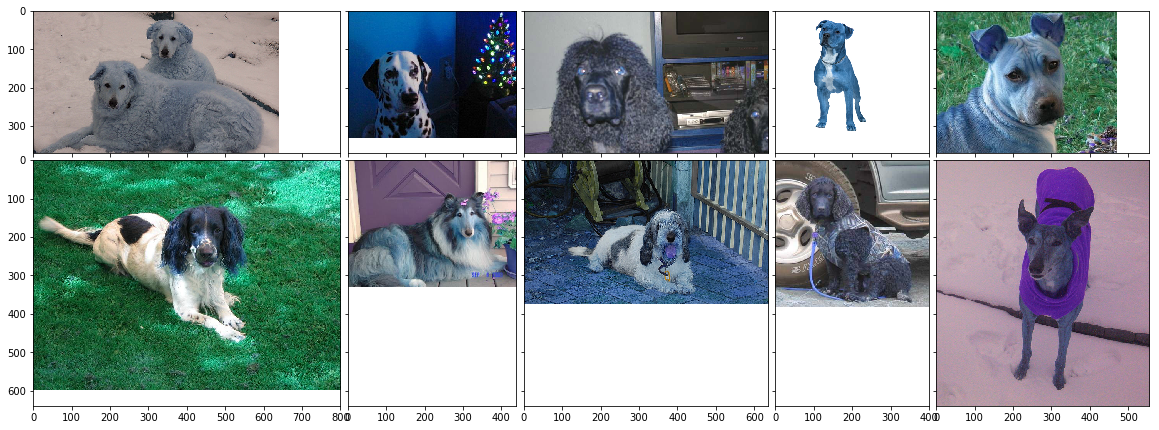

In [6]:
imgs = [cv2.imread(x) for x in train_files[:10]]
fig = plt.figure(figsize=(20, 20))
grid = ImageGrid(fig, 111, nrows_ncols=(int(10/5), 5), axes_pad=0.1)

for ax, imagem in zip(grid, imgs):
    ax.imshow(imagem)

Number of faces detected: 1


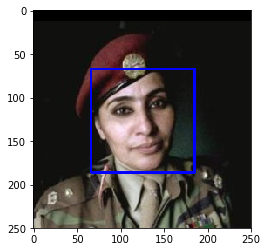

In [7]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[3])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [8]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

In [9]:
human_files_short = human_files[:100]
dog_files_short = train_files[:100]
# Do NOT modify the code above this line.

## TODO: Test the performance of the face_detector algorithm
accuracy_human = sum([face_detector(file) for file in human_files_short])/100
accuracy_dog = sum([face_detector(file) for file in dog_files_short])/100
## on the images in human_files_short and dog_files_short.

In [10]:
print("percentage of the first 100 images in human_files:", accuracy_human)
print("percentage of the first 100 images in dog_files:", accuracy_dog)

percentage of the first 100 images in human_files: 1.0
percentage of the first 100 images in dog_files: 0.11


__Question 2:__ This algorithmic choice necessitates that we communicate to the user that we accept human images only when they provide a clear view of a face (otherwise, we risk having unneccessarily frustrated users!). In your opinion, is this a reasonable expectation to pose on the user? If not, can you think of a way to detect humans in images that does not necessitate an image with a clearly presented face?

__Answer:__

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on each of the datasets.

In [11]:
from keras.applications.resnet50 import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

102858752/102853048 [==============================] - 2s 0us/step


# III. Methodology
### Data Preprocessing



When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [12]:
from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [13]:
from keras.applications.resnet50 import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained ResNet-50 model, we need only check if the `ResNet50_predict_labels` function above returns a value between 151 and 268 (inclusive).

We use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [14]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

### (IMPLEMENTATION) Assess the Dog Detector

__Question 3:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

In [15]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
accuracy_human_2 = sum([dog_detector(file) for file in human_files_short])/100
accuracy_dog_2 = sum([dog_detector(file) for file in dog_files_short])/100

In [16]:
print("percentage of the first 100 images in human_files:", accuracy_human_2)
print("percentage of the first 100 images in dog_files:", accuracy_dog_2)

percentage of the first 100 images in human_files: 0.0
percentage of the first 100 images in dog_files: 1.0


###  Data Preprocessing Step 2

We rescale the images by dividing every pixel in every image by 255.

In [17]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 836/836 [00:07<00:00, 107.67it/s]


### Implementation

In this step we will implement some models, some being from 0 and others using transfer learning and combining an own architecture together with transfer learning.

### Algorithms and Techniques

#### CNN
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

#### Transfer Learning
Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        model.summary()

We have imported some Python modules to get you started, but feel free to import as many modules as you need.  If you end up getting stuck, here's a hint that specifies a model that trains relatively fast on CPU and attains >1% test accuracy in 5 epochs:

![Sample CNN](images/sample_cnn.png)
           
__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  If you chose to use the hinted architecture above, describe why you think that CNN architecture should work well for the image classification task.

__Answer:__ 

In [18]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, InputLayer
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))
model.add(Conv2D(64,3, padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64,3, padding='same',activation='relu'))
model.add(MaxPooling2D(2))
model.add(GlobalAveragePooling2D())
model.add(Dense(133))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 133)               8645      
Total para

### Compile the Model

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [20]:
from keras.callbacks import ModelCheckpoint  

### TODO: specify the number of epochs that you would like to use to train the model.

epochs = 5

### Do NOT modify the code below this line.

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/5
6680/6680 [==============================] - 62s 9ms/step - loss: 8.4141 - acc: 0.0066 - val_loss: 8.0108 - val_acc: 0.0060
Epoch 2/5
6680/6680 [==============================] - 61s 9ms/step - loss: 7.9625 - acc: 0.0058 - val_loss: 8.0108 - val_acc: 0.0060
Epoch 3/5
6680/6680 [==============================] - 61s 9ms/step - loss: 7.9625 - acc: 0.0058 - val_loss: 8.0108 - val_acc: 0.0060
Epoch 4/5
6680/6680 [==============================] - 61s 9ms/step - loss: 7.9625 - acc: 0.0058 - val_loss: 8.0108 - val_acc: 0.0060
Epoch 5/5
6680/6680 [==============================] - 62s 9ms/step - loss: 7.9625 - acc: 0.0058 - val_loss: 8.0108 - val_acc: 0.0060


### Load the Model with the Best Validation Loss

In [21]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of dog images.  Ensure that your test accuracy is greater than 1%.

In [22]:
# get index of predicted dog breed for each image in test set
dog_breed_predictions = [np.argmax(model.predict(np.expand_dims(tensor, axis=0))) for tensor in test_tensors]

# report test accuracy
test_accuracy = 100*np.sum(np.array(dog_breed_predictions)==np.argmax(test_targets, axis=1))/len(dog_breed_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 0.5981%


why you think that CNN architecture should work well for the image classification task.

**Answer**: 

CNN is the best option for image classification, since it makes several transformations, reducing the image dimensions, but keeping its spatial properties and strong characteristics, so that the Fully connected layer does the classification work with a smaller amount of parameters and greater accuracy

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [23]:
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [24]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [25]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [26]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 287us/step - loss: 11.6611 - acc: 0.1373 - val_loss: 10.0010 - val_acc: 0.2275
Epoch 2/20
6680/6680 [==============================] - 2s 245us/step - loss: 9.2018 - acc: 0.3207 - val_loss: 9.1922 - val_acc: 0.3281
Epoch 3/20
6680/6680 [==============================] - 2s 245us/step - loss: 8.7067 - acc: 0.3862 - val_loss: 9.0602 - val_acc: 0.3461
Epoch 4/20
6680/6680 [==============================] - 2s 244us/step - loss: 8.4627 - acc: 0.4228 - val_loss: 8.8252 - val_acc: 0.3653
Epoch 5/20
6680/6680 [==============================] - 2s 246us/step - loss: 8.2979 - acc: 0.4473 - val_loss: 8.7368 - val_acc: 0.3880
Epoch 6/20
6680/6680 [==============================] - 2s 247us/step - loss: 8.1115 - acc: 0.4600 - val_loss: 8.5916 - val_acc: 0.3916
Epoch 7/20
6680/6680 [==============================] - 2s 247us/step - loss: 7.9403 - acc: 0.4760 - val_loss: 8.5891 - val_acc: 0.3832

### Load the Model with the Best Validation Loss

In [27]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [28]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 45.5742%


### Predict Dog Breed with the Model

In [29]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [30]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Refinement

Now that we've implemented a network from scratch and are using transferning, let's use the two techniques together to achieve even better results.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 



In [31]:
### TODO: Define your architecture.
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=(train_VGG16.shape[1:])))
VGG16_model.add(Dense(256, activation='relu'))
VGG16_model.add(Dense(512, activation='relu'))
VGG16_model.add(Dropout(0.5))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 133)               68229     
Total params: 331,141
Trainable params: 331,141
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [32]:
### TODO: Compile the model.
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [33]:
### TODO: Train the model.
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.2.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 364us/step - loss: 3.5363 - acc: 0.2958 - val_loss: 1.5281 - val_acc: 0.5665
Epoch 2/20
6680/6680 [==============================] - 2s 311us/step - loss: 1.5226 - acc: 0.5936 - val_loss: 1.2061 - val_acc: 0.6575
Epoch 3/20
6680/6680 [==============================] - 2s 311us/step - loss: 1.1632 - acc: 0.6787 - val_loss: 1.1202 - val_acc: 0.6814
Epoch 4/20
6680/6680 [==============================] - 2s 308us/step - loss: 0.9250 - acc: 0.7434 - val_loss: 1.1533 - val_acc: 0.7042
Epoch 5/20
6680/6680 [==============================] - 2s 315us/step - loss: 0.8085 - acc: 0.7807 - val_loss: 1.1155 - val_acc: 0.7210
Epoch 6/20
6680/6680 [==============================] - 2s 309us/step - loss: 0.7467 - acc: 0.8007 - val_loss: 1.2371 - val_acc: 0.7174
Epoch 7/20
6680/6680 [==============================] - 2s 309us/step - loss: 0.6429 - acc: 0.8286 - val_loss: 1.4890 - val_acc: 0.7198
E

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [34]:
### TODO: Load the model weights with the best validation loss.
VGG16_model.load_weights('saved_models/weights.best.2.VGG16.hdf5')

In [35]:
VGG16_model.save_weights('model_weights')


# IV. Results
### Model Evaluation and Validation
Now let's use our test dataset to see how well we did, and we'll also use screenshots from my local computer to see how the network actually performs on any data used.

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 70%.

In [36]:
from sklearn.metrics import accuracy_score, precision_score

#### Classiffication Accuracy

In [37]:
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]
y_true = np.argmax(test_targets, axis=1)

In [39]:
accuracy_score(y_true, VGG16_predictions)

0.72009569377990434

In [52]:
precision_score(y_true, VGG16_predictions,average='macro')

/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.75395917537668977

### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [41]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
def VGG16_predict(img_path):
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

A sample image and output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_2.png)

This photo looks like an Afghan Hound.
### (IMPLEMENTATION) Write your Algorithm

In [42]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import Image
def predict_dogs(img_path):
    if face_detector(img_path) or dog_detector(img_path)>0:
        return VGG16_predict(img_path)
    else:
        return 'Error neither Dog or Human was inserted'

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

In [43]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
import os
human_path = 'transferir (2).jfif'
human_2_path = 'istockphoto-1313649143-170667a.jpg'
neither_path = 'A-4067905-1616829548-3946.jpeg.jpg'
neither_2_path = 'cat-cafe-pet.jpg'
labrador_path = '09da763c76d1b2ac7507841d45088491740107a4r1-719-751v2_00.jpg'
dog_path = 'cachorro-card-3.png'

In [44]:
predict_dogs(human_path)

58892288/58889256 [==============================] - 1s 0us/step


'ages/train/127.Silky_terrier'

In [45]:
predict_dogs(human_2_path)

'Error neither Dog or Human was inserted'

In [46]:
predict_dogs(neither_path)

'Error neither Dog or Human was inserted'

In [47]:
predict_dogs(neither_2_path)

'Error neither Dog or Human was inserted'

In [48]:
predict_dogs(labrador_path)

'ages/train/076.Golden_retriever'

In [49]:
predict_dogs(dog_path)

'ages/train/072.German_shorthaired_pointer'

# V. Conclusion
### Reflection

First we reading the data, is a very simple task, since the exploration and visualization varies a lot based on the data, with images it is a simpler task sometimes.

However, the preprocessing part is a little more complex, there are several transformations that can be done on an image so that the model understands it well.

The implementation of the model is something that can be tiring since we need to test different architectures, like from scratch, with transferlearning, or a mixture of these.

The evaluation part of the model already becomes something simpler once we had already defined which metrics we would use and why.

It is interesting to see that due to the large amount of classes and little data, the model does not perform well during training, but thanks to transfer learning, even with a small amount of data, we were able to achieve reasonable metrics.

It is also very difficult to decide how many layers to choose, if we choose many layers, the accuracy increases, but the model becomes heavier and slower, perhaps this varies with the problem.

### Improvement
**Answer**

1-More data
Provide a larger dataset with more variant images of dogs, such as dressed dogs

2-Data augmentation
Use data augmentation techniques to make the model more accurate

3- Deeper architecture
We use a very simple network, maybe one with more Dense layers could help more to detect the patterns of each class